##Some Useful Python Tips and Tricks
Here are just some useful things I've learned thus far in terms of using python. Some if it might be useful, some might not but I figured I'd give it a try anyways!


###Just importing libraries you might need

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

%pylab inline
import sys
import os
from astropy.io import ascii

Populating the interactive namespace from numpy and matplotlib


##Making Plots
This is just a plot of random number, but it shows you how to give things titles and also, using a random number generator. We're creating an array of numbers here.

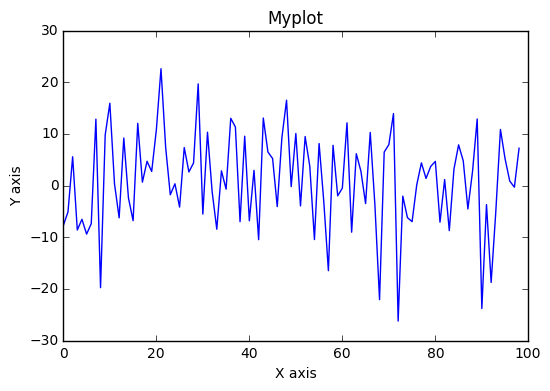

In [13]:
rcParams["savefig.dpi"] = 100  # this makes all the plots a little bigger
x = np.arange(0,99,dtype=float)
y = np.random.normal(0,10,(99,))
plt.plot(x,y) #This is what you're plotting
plt.ylabel('Y axis') #This gives you a y axis label
plt.xlabel('X axis') #This gives you an x axis label
plt.title('Myplot') #This gives you a title
plt.show() #This command actually shows your plot. You want to include this line whenever you want to print out a plot

##Doing Some Snazzy Data Reduction!
In this next block of code, we're going to look at some real data taken from Mosaic1 at Kitt Peak. This block might take some time to load, so be patient. We're importing a FITS file. A FITS file is a digital file format used often in astronomy for storage, transmission and processing of scientific images. This file is a compoliation of 8 CCDs. 

Filename: /Users/Madelyn/.astropy/cache/download/8ebb1f847c91674076da9963e565d225
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     230   ()              
1    im1         CompImageHDU    196   (2136, 4096)   int16   
2    im2         CompImageHDU    196   (2136, 4096)   int16   
3    im3         CompImageHDU    196   (2136, 4096)   int16   
4    im4         CompImageHDU    196   (2136, 4096)   int16   
5    im5         CompImageHDU    196   (2136, 4096)   int16   
6    im6         CompImageHDU    196   (2136, 4096)   int16   
7    im7         CompImageHDU    196   (2136, 4096)   int16   
8    im8         CompImageHDU    196   (2136, 4096)   int16   


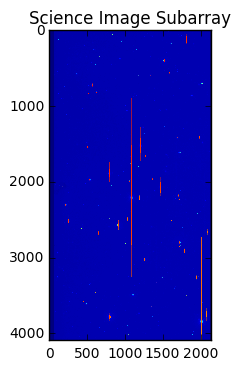

In [3]:
import sys
#Import file from Eric's Website
raw_image = fits.open ('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/raw_image_data.fits')

#Get info on the image
raw_image.info()

#There are 8 chips, pick one
chip1 = raw_image[1].data


ScienceImage=raw_image[1].data

#Creating image of sky
plt.imshow(ScienceImage)
plt.title('Science Image Subarray')
plt.show()


#If you want to build graphs of this data, you need to flatten the data first. Command looks like this
# flatimage=ScienceImage.flatten()

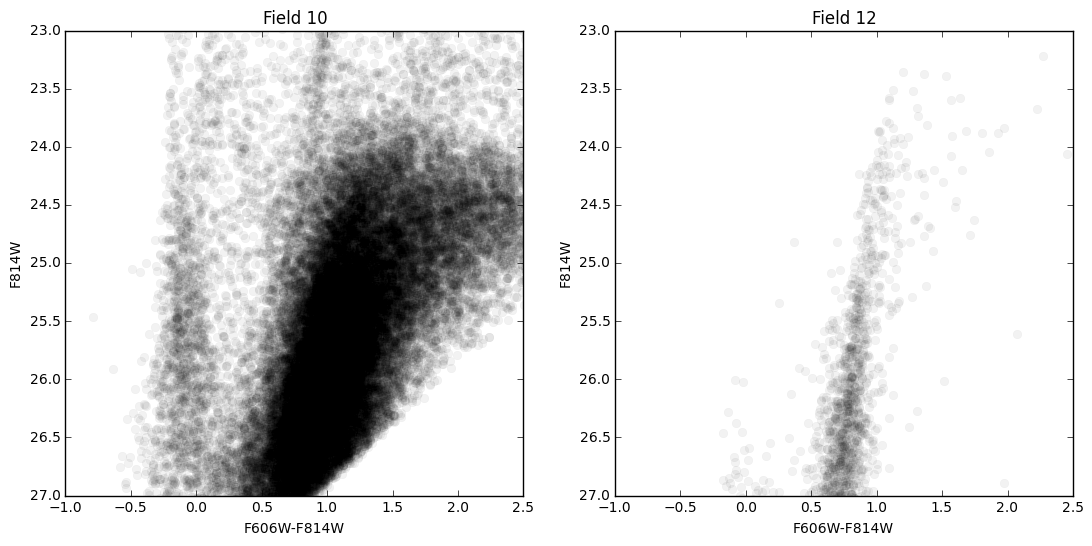

In [17]:
#Making Plots appear next to eachother
gh_data = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field10.newphoto_radec')
gh_data1 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field12.newphoto_radec')

#These columns come from how Eric saved the data into his personal website
ra = gh_data['col5'][:]
dec = gh_data['col6'][:]
f606 = gh_data['col3'][:]
f814 = gh_data['col4'][:]

ra2 = gh_data1['col5'][:]
dec2 = gh_data1['col6'][:]
f6062 = gh_data1['col3'][:]
f8142= gh_data1['col4'][:]

figure(figsize(13,6))  #THIS LINE MAKES THE PLOTS BIGGER
plt.subplot(121)    #THIS LINE SAYS YOU'RE PLOTTING 1 ROW OF IMAGES, THERE ARE 2 IMAGES IN THE ROW, AND THIS IS IMAGE 1
plot(f606-f814,f814, 'ko', alpha=0.05)   
axis([-1,2.5,27,23]) 
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 10')

plt.subplot(122) #THIS LINE SAYS YOU'RE PLOTTING ! ROW OF IMAGES, THERE ARE 2 IMAGES IN THE ROW, AND THIS IS IMAGE 2
plot(f6062-f8142,f8142, 'ko', alpha=0.05)   
axis([-1,2.5,27,23])  
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 12')
plt.show()  #NOTE THAT YOU WAIT UNTIL YOU ARE DONE WITH THIS SUBPLOT TO USE COMMANd plt.show()

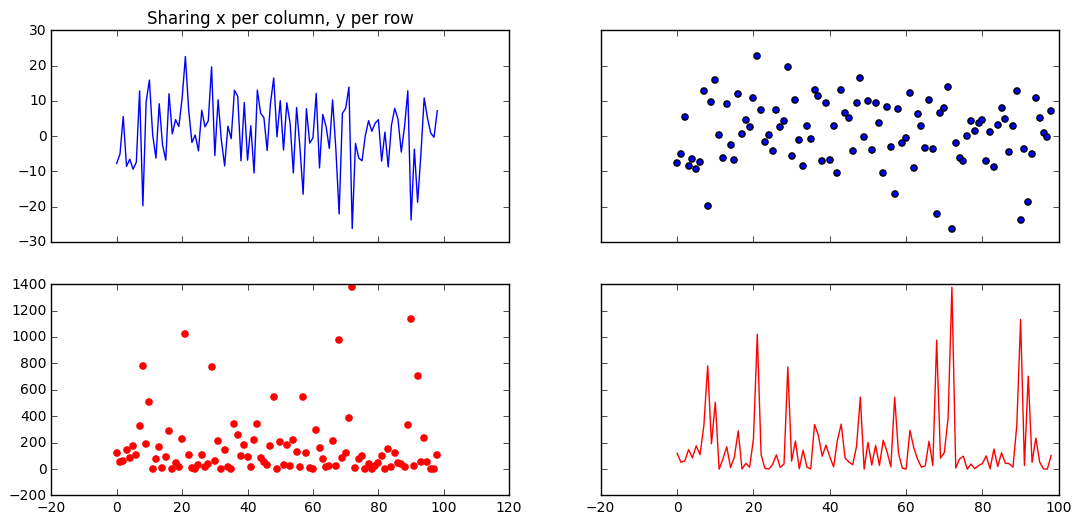

In [18]:
#Here are some more random plots. This is another way to plot different things next to eachother!
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show() # OR plt.savefig('sine_function_legend.png')

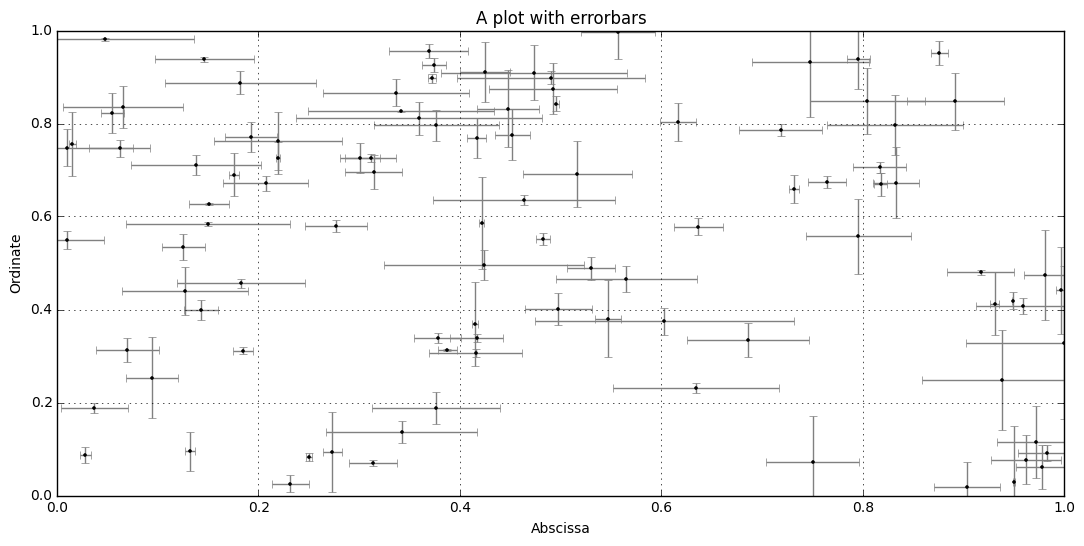

In [21]:
#Here is another random plot, but this one has error bars!
x, y = np.random.random([2, 100])
xerr = np.random.normal(0., 0.05, 100)
yerr = np.random.normal(0., 0.05, 100)
plt.errorbar(x, y, xerr, yerr, fmt = '.k', ecolor = 'gray', lw = 1, ms = 4)
plt.xlabel('Abscissa')
plt.ylabel('Ordinate')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.title('A plot with errorbars')

(array([ 11.,  14.,   7.,  14.,  16.,   6.,   4.,   7.,   7.,  14.]),
 array([ 0.01010469,  0.10903681,  0.20796894,  0.30690106,  0.40583318,
         0.5047653 ,  0.60369743,  0.70262955,  0.80156167,  0.9004938 ,
         0.99942592]),
 <a list of 10 Patch objects>)

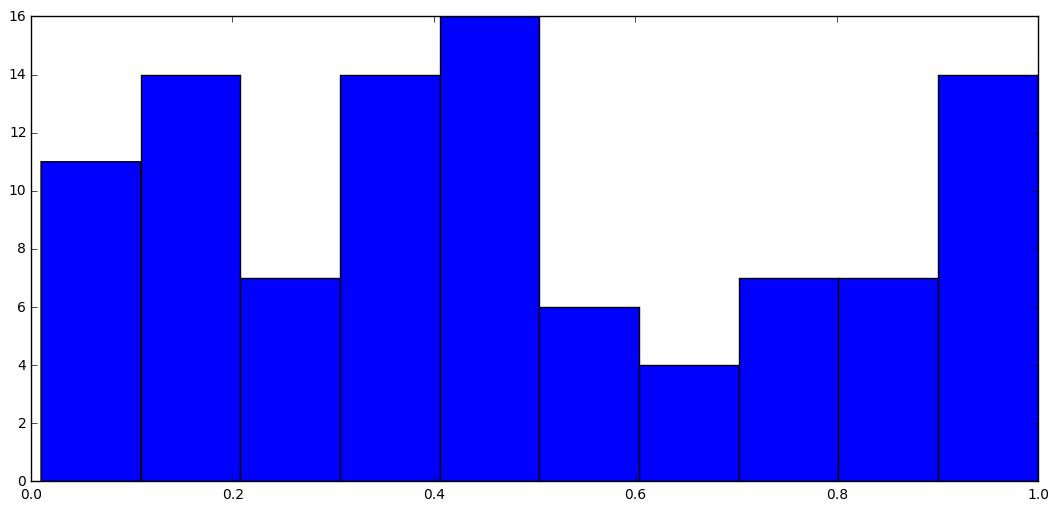

In [22]:
#Plotting a histogram! Ooooooh.... Ahhhhhh...
#In this case, x is your snazzy histogram worthy data, here it is just a random array 
plt.hist(x)